In [331]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from math import pi, sin, cos, exp

# Clustering Problem

In [ ]:
# ask about underlying assumption

In [ ]:
# how do we measure the distance

In [ ]:
# what is an update rule

In [ ]:
# do it by hand

In [ ]:
# how to initialize the seed? What wrong with [0,0,0 ]

In [ ]:
# implement

In [ ]:
# when it works
# when it fails (Why)

In [ ]:
# Spectral
# Block diagonal and eigen value/vector intuition 
# Affinity/Adjacency Graph/matrix
# Relation to min cut

In [33]:
a = np.array([
[2, -1, -1, 0, 0, 0, -0.001, 0, 0],
[-1, 2, -1, 0, 0, 0, 0, 0, 0],
[-1, -1, 2, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, -1, 0, 0, 0, 0],
[0, 0, 0, -1, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 3, -1, -1, -1],
[0, 0, 0, 0, 0, -1, 3, -1, -1],
[0, 0, 0, 0, 0, -1, -1, 3, -1],
[0, 0, 0, 0, 0, -1, -1, -1, 3],
], dtype=np.float64)
s = np.linalg.eigh(a, 'U')
print s[0]
print np.array_str(s[1], precision=1, max_line_width=100, suppress_small=True)

[ -2.88734169e-04  -5.31259065e-18   2.88616114e-04   2.00000000e+00
   2.99999956e+00   3.00000000e+00   4.00000000e+00   4.00000000e+00
   4.00000056e+00]
[[ 0.4  0.   0.4  0.  -0.8  0.  -0.  -0.  -0. ]
 [ 0.4 -0.   0.4 -0.   0.4 -0.7  0.   0.   0. ]
 [ 0.4  0.   0.4  0.   0.4  0.7  0.   0.   0. ]
 [-0.  -0.7  0.  -0.7 -0.   0.   0.   0.   0. ]
 [-0.  -0.7  0.   0.7  0.   0.   0.  -0.  -0. ]
 [ 0.4 -0.  -0.4 -0.   0.   0.  -0.7 -0.3 -0.3]
 [ 0.4 -0.  -0.4  0.  -0.   0.   0.   0.   0.9]
 [ 0.4 -0.  -0.4  0.   0.  -0.   0.7 -0.5 -0.3]
 [ 0.4 -0.  -0.4 -0.   0.   0.   0.1  0.8 -0.3]]


In [ ]:
np.linalg.eigh()

[[  0.70043318   1.45154151]
 [  0.48552753   0.70909288]
 [  0.3401219   -1.09542479]
 [  1.48090795  -0.51894366]
 [ -1.7945545    1.96982783]
 [ -1.20847911  -1.5521087 ]
 [  0.22146008   0.88201429]
 [  0.3741538   -0.2382364 ]
 [  1.59398049   1.61813075]
 [  1.95946468  -1.03118986]
 [  8.73574486  11.07037302]
 [  9.9791094   10.77121515]
 [ 11.14805476  10.41170877]
 [ 11.1806774    9.3212832 ]
 [ 10.05667351   9.39216729]
 [ 10.76684449   7.66533397]
 [ 10.58495199   8.54681774]
 [  9.15569649  10.48805369]
 [  9.04777242   9.96650163]
 [  9.31554441   8.4591205 ]
 [-10.84571247  11.11697138]
 [-10.77882028   9.29565181]
 [ -8.86336749   9.18861954]
 [-10.74800026  10.86188084]
 [-10.58864128  10.11511266]
 [-10.27678632   7.72525159]
 [ -7.3482848    8.52354794]
 [-10.48025324   8.69127625]
 [ -9.32999222  11.00616097]
 [-10.5564824   11.08568958]]


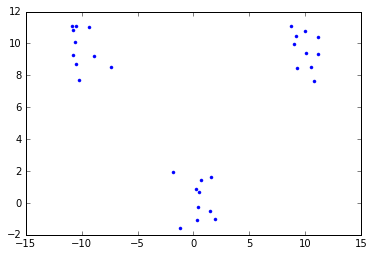

In [106]:
xs = np.random.randn(30,2)
xs[10:20,:] = xs[10:20,:]+[10,10]
xs[20:30,:] = xs[20:30,:]+[-10,10]
plt.plot(xs[:,0], xs[:, 1], '.b')
print xs

In [332]:
def classify(data, cc):
    ncluster, nfeature = cc.shape
    d = []
    for idata, dp in enumerate(data):
        distances = [ np.sum((dp - c)**2) for c in cc]
        clusterno = np.argmin(distances)
        d.append(clusterno)
    return np.array(d)

def k_mean(data, seed):
    # first figure out which point belong to each cluster
    cc = np.array(seed).copy()
    ncluster, nfeature = cc.shape
    for i in range(100):
        classes = classify(data, cc)
        #print classes
        cc = [np.average(np.array(data[classes==i,:]), axis=0) for i in range(ncluster)]
        cc = np.array(cc)
        #print cc
    return cc
k_mean(xs , [[0,0], [1,1], [2,2]] )

array([[-9.98163408,  9.76101626],
       [ 0.4153016 ,  0.21947039],
       [ 9.99710697,  9.6092575 ]])

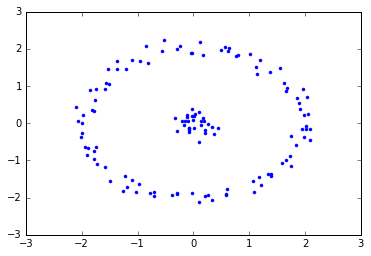

In [333]:
np.random.seed(9999)
ndata = 100
thetas = np.linspace(0,2*math.pi,ndata)
data1 = np.array([
    [2*cos(theta) for theta in thetas],
    [2*sin(theta) for theta in thetas]
])

data1 = data1 + np.random.randn(2, ndata)*0.1

data2 = np.random.randn(2, 30)*0.2

#plt.plot(data1[0], data1[1], '.')
#plt.plot(data2[0], data2[1], '.')

data = np.concatenate((data1, data2), axis=1)
sorted_data = data.copy().T
np.random.shuffle(data.T)


data = data.T
#print data
plt.plot(data[:, 0], data[:, 1],'.')


[ -3.21187176e-16   1.54765243e+00   1.66593132e+00   3.11367936e+00
   3.76239936e+00   4.27255589e+00   6.69337762e+00   7.34315784e+00
   9.56428663e+00   9.86833340e+00   1.13135631e+01   1.20107885e+01
   1.23430912e+01   1.27367072e+01   1.29741556e+01   1.31071836e+01
   1.32476581e+01   1.33812062e+01   1.34757697e+01   1.35158909e+01
   1.36595599e+01   1.36920009e+01   1.37983058e+01   1.39063531e+01
   1.39843659e+01   1.40128766e+01   1.40202277e+01   1.41175883e+01
   1.41496729e+01   1.41946414e+01   1.42115270e+01   1.42324999e+01
   1.42465927e+01   1.42668894e+01   1.42838828e+01   1.43669627e+01
   1.44089464e+01   1.44313231e+01   1.44810907e+01   1.44995695e+01
   1.45215380e+01   1.45259893e+01   1.45719159e+01   1.45853892e+01
   1.45886986e+01   1.46088417e+01   1.46368828e+01   1.46640712e+01
   1.46893795e+01   1.46971984e+01   1.46980657e+01   1.47031818e+01
   1.47479642e+01   1.47741525e+01   1.48074360e+01   1.48119534e+01
   1.48627613e+01   1.49444477e+01

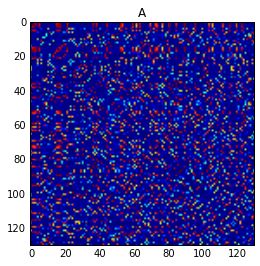

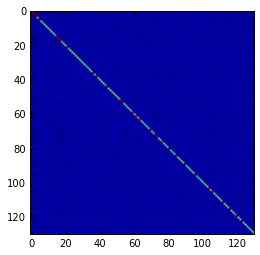

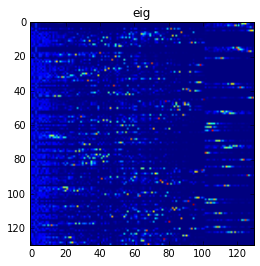

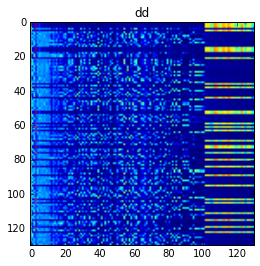

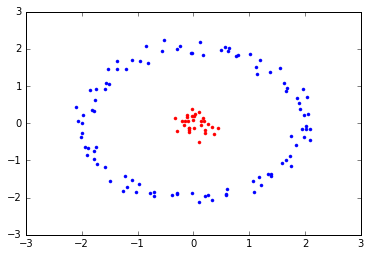

In [334]:
#Build adjacency matrix

nfeature, ndata = data.shape
def adj_matrix(data, threshold):
    ndata, nfeature = data.shape
    A = np.zeros((ndata, ndata))
    for idata in range(ndata):
        for jdata in range(ndata):
            if idata == jdata:
                distance = 200
            else:
                distance = np.sqrt(np.sum((data[idata]- data[jdata])**2))
            A[idata, jdata] = exp(-distance**2/threshold**2)#1 if distance < threshold else 0
            A[jdata, idata] = A[idata, jdata]
    #print np.array_str(A, precision=1, max_line_width=100, suppress_small=True)
    return A


def deg_matrix(A):
    n, n = A.shape
    D = np.zeros((n,n))
    for i in range(n):
        #D[i,i] = np.sum(1 if A[i,j]>0 else 0 for j in range(n))
        D[i,i] = np.sum(A[i])
    return D

# threshold = 2
# plt.imshow(adj_matrix(sorted_data, threshold))
# plt.figure()
# plt.imshow(adj_matrix(data, threshold))

my_data = data
A = adj_matrix(my_data, 1.0)
plt.figure()
plt.imshow(A)
plt.title('A')
D = deg_matrix(A) 
L = D - A
plt.figure()
plt.imshow(L)
eig = np.linalg.eigh(L)[1]
print np.linalg.eigh(L)[0]
plt.figure()
plt.imshow(np.abs(eig))
plt.title('eig')
nf = 100
dd = np.dot(A, np.abs(eig))#np.abs(eig[:,2:100]))
dd = np.abs(dd)


plt.figure()
plt.imshow(np.abs(dd))
plt.title('dd')

centroids = k_mean(A, [A[0],A[-1]])
clusters = classify(A, centroids)
plt.figure()
plt.plot(my_data[clusters==0, 0], my_data[clusters==0, 1], '.b')
plt.plot(my_data[clusters==1, 0], my_data[clusters==1, 1], '.r')
# plt.figure()
# plt.plot(dd)
# plt.figure()
# t = -0.4
# plt.plot(my_data[dd>t, 0], my_data[dd>t, 1], '.g')
# plt.plot(my_data[dd<t, 0], my_data[dd<t, 1], '.r')


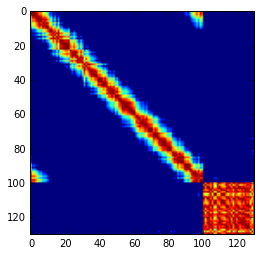

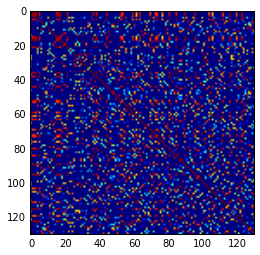

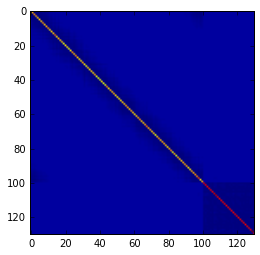

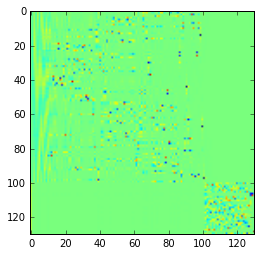

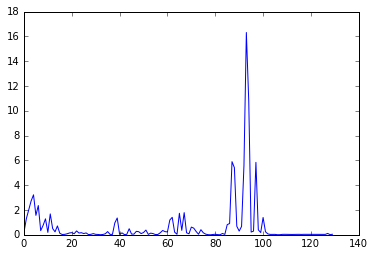

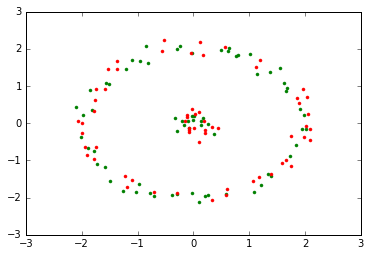

In [288]:
#Build adjacency matrix

nfeature, ndata = data.shape
def adj_matrix(data, threshold):
    ndata, nfeature = data.shape
    A = np.zeros((ndata, ndata))
    for idata in range(ndata):
        for jdata in range(ndata):
            if idata == jdata:
                distance = 0
            else:
                distance = np.sum((data[idata]- data[jdata])**2)
            A[idata, jdata] = exp(-distance/threshold**2) if distance < 2*threshold else 0
            A[jdata, idata] = A[idata, jdata]
    #print np.array_str(A, precision=1, max_line_width=100, suppress_small=True)
    return A


def deg_matrix(A):
    n, n = A.shape
    D = np.zeros((n,n))
    for i in range(n):
        #one could use sum of weight
        D[i,i] = np.sum(1 if A[i,j]>0 else 0 for j in range(n))
    return D

threshold = 1
plt.imshow(adj_matrix(sorted_data, threshold))
plt.figure()
plt.imshow(adj_matrix(data, threshold))

my_data = data
A = adj_matrix(sorted_data, threshold)
D = deg_matrix(A)  
L = D - A
plt.figure()
plt.imshow(L)
eig = np.linalg.eigh(L)[1][2]
plt.figure()
plt.imshow(np.linalg.eigh(L)[1])
#print eig
dd = np.dot(L, eig)
dd=np.abs(dd)
plt.figure()
plt.plot(dd)
plt.figure()
t = 0.1
plt.plot(my_data[dd>t, 0], my_data[dd>t, 1], '.g')
plt.plot(my_data[dd<t, 0], my_data[dd<t, 1], '.r')



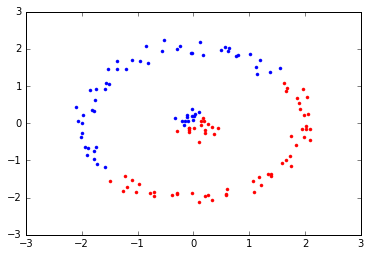

In [216]:
centroids = k_mean(data, [data[1], data[2]])
classes = classify(data, centroids)
plt.plot(data[classes==0,0], data[classes==0,1], '.r')
plt.plot(data[classes==1,0], data[classes==1,1], '.b')
    